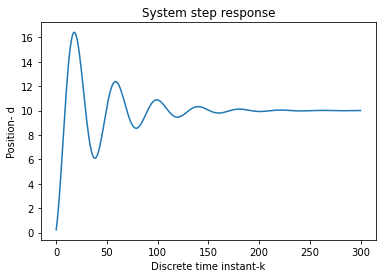

In [16]:
import numpy as np
import os
import matplotlib.pyplot as plt

# define the continuous-time system matrices

A=np.matrix([[0, 1],[- 0.1, -0.05]])
B=np.matrix([[0],[1]])
C=np.matrix([[1, 0]])
#define an initial state for simulation
x0=np.random.rand(2,1)

#define the number of time-samples used for the simulation and the sampling time for the discretization
time=300
sampling=0.5

#define an input sequence for the simulation
#input_seq=np.random.rand(time,1)
input_seq=np.ones(time)
#plt.plot(input_sequence)


# the following function simulates the state-space model using the backward Euler method
# the input parameters are:
#    -- A,B,C              - continuous time system matrices 
#    -- initial_state      - the initial state of the system 
#    -- time_steps         - the total number of simulation time steps 
#    -- sampling_perios    - the sampling period for the backward Euler discretization 
# this function returns the state sequence and the output sequence
# they are stored in the vectors Xd and Yd respectively
def simulate(A,B,C,initial_state,input_sequence, time_steps,sampling_period):
    from numpy.linalg import inv
    I=np.identity(A.shape[0]) # this is an identity matrix
    Ad=inv(I-sampling_period*A)
    Bd=Ad*sampling_period*B
    Xd=np.zeros(shape=(A.shape[0],time_steps+1))
    Yd=np.zeros(shape=(C.shape[0],time_steps+1))
    
    for i in range(0,time_steps):
       if i==0:
           Xd[:,[i]]=initial_state
           Yd[:,[i]]=C*initial_state
           x=Ad*initial_state+Bd*input_sequence[i]
       else:
           Xd[:,[i]]=x
           Yd[:,[i]]=C*x
           x=Ad*x+Bd*input_sequence[i]
    Xd[:,[-1]]=x
    Yd[:,[-1]]=C*x
    return Xd, Yd
    
state, output=simulate(A,B,C,x0,input_seq, time ,sampling)    


plt.plot(output[0,:])
plt.xlabel('Discrete time instant-k')
plt.ylabel('Position- d')
plt.title('System step response')
plt.savefig('step_response.png')
###############################################################################
#               end of model definition and simulation
############################################################################### 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

###############################################################################
#                   Model definition
###############################################################################

# First, we need to define the system matrices of the state-space model:
# this is a continuous-time model, we will simulate it using the backward Euler method
A=np.matrix([[0, 1],[- 0.1, -0.000001]])
B=np.matrix([[0],[1]])
C=np.matrix([[1, 0]])

#define the number of time samples used for simulation and the discretization step (sampling)
time=200
sampling=0.5

###############################################################################
#                  Create the training data
###############################################################################
#define an input sequence for the simulation
input_seq_train=np.random.rand(time,1)
#define an initial state for simulation
x0_train=np.random.rand(2,1)


# here we simulate the dynamics
state,output_train=simulate(A,B,C,x0_train,input_seq_train, time ,sampling)    

output_train=output_train.T
# this is the output data used for training
output_train=np.reshape(output_train,(1,output_train.shape[0],1))
print(f"output_train: {output_train.shape}")

input_seq_train=np.reshape(input_seq_train, (input_seq_train.shape[0],1))

tmp_train=np.concatenate((input_seq_train, np.zeros(shape=(input_seq_train.shape[0],1))), axis=1)
tmp_train=np.concatenate((x0_train.T,tmp_train), axis=0)

# this is the input data used for training
trainX=np.reshape(tmp_train, (1,tmp_train.shape[0],tmp_train.shape[1]))
print(f"trainX: {trainX.shape}")

###############################################################################
#               Create the validation data
###############################################################################
# new random input sequence
input_seq_validate=np.random.rand(time,1)
# new random initial condition
x0_validate=np.random.rand(2,1)

# create a new ouput sequence by simulating the system 
state_validate,output_validate=simulate(A,B,C,x0_validate,input_seq_validate, time ,sampling)    
output_validate=output_validate.T
# this is the output data used for validation
output_validate=np.reshape(output_validate,(1,output_validate.shape[0],1))
print(f"output_validate: {output_validate.shape}")

input_seq_validate=np.reshape(input_seq_validate,(input_seq_validate.shape[0],1))
tmp_validate=np.concatenate((input_seq_validate, np.zeros(shape=(input_seq_validate.shape[0],1))), axis=1)
tmp_validate=np.concatenate((x0_validate.T,tmp_validate), axis=0)
# this is the input data used for validation
validateX=np.reshape(tmp_validate, (1,tmp_validate.shape[0],tmp_validate.shape[1]))
print(f"validateX: {validateX.shape}")

###############################################################################
#               Create the test data
###############################################################################
# new random input sequence
input_seq_test=np.random.rand(time,1)
# new random initial condition
x0_test=np.random.rand(2,1)

# create a new ouput sequence by simulating the system 
state_test,output_test=simulate(A,B,C,x0_test,input_seq_test, time ,sampling)    
output_test=output_test.T
# this is the output data used for test
output_test=np.reshape(output_test,(1,output_test.shape[0],1))
print(f"output_test: {output_test.shape}")

input_seq_test=np.reshape(input_seq_test,(input_seq_test.shape[0],1))
tmp_test=np.concatenate((input_seq_test, np.zeros(shape=(input_seq_test.shape[0],1))), axis=1)
tmp_test=np.concatenate((x0_test.T,tmp_test), axis=0)
# this is the input data used for test
testX=np.reshape(tmp_test, (1,tmp_test.shape[0],tmp_test.shape[1]))
print(f"testX: {testX.shape}")

output_train: (1, 201, 1)
trainX: (1, 201, 2)
output_validate: (1, 201, 1)
validateX: (1, 201, 2)
output_test: (1, 201, 1)
testX: (1, 201, 2)


In [18]:
###############################################################################
#                Here we define the network
###############################################################################

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint

model=Sequential()
#model.add(SimpleRNN(32, input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
#model.add(GRU(32, input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(32, input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
#model.add(Dense(1))
model.add(TimeDistributed(Dense(1)))  #there is no difference between this and model.add(Dense(1))...
# does not make sense to use metrics=['acc'], see https://stackoverflow.com/questions/41819457/zero-accuracy-training-a-neural-network-in-keras
model.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 201, 32)           4480      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 201, 1)            33        
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________


In [21]:
# after every epoch, we save the model, this is the absolute path on my C: drive, so the path is
# C:\python_files\system_identification\models\

model_dir = os.path.abspath('sysid_test_example')

if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
file_path = os.path.join(model_dir, "weights-{epoch:02d}-{val_loss:.6f}.hdf5")

checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]
history=model.fit(trainX, output_train,
                  epochs = 200, batch_size=1, 
                  callbacks = callbacks_list, 
                  validation_data = (validateX, output_validate), 
                  verbose = 2)

# load the model with the smallest validation loss
#model.load_weights("weights-1997-1.878475.hdf5")

# use the test data to predict the model response
testPredict = model.predict(testX)

###############################################################################
#  Plot the predicted and "true" output and plot training and validation losses
###############################################################################

# plot the predicted and the "true" (test) outputs
time_plot=range(1,time+2)
plt.figure()
plt.plot(time_plot, testPredict[0, :,0], label='Real output')
plt.plot(time_plot, output_test[0, :], 'r', label='Predicted output')
plt.xlabel('Discrete time steps')
plt.ylabel('Output')
plt.legend()
plt.savefig('responseLSTM32.png')
plt.show()

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.savefig('lossLSTM32.png')
plt.show()

Train on 1 samples, validate on 1 samples
Epoch 1/200
1/1 - 0s - loss: 5.9183 - mean_squared_error: 5.9183 - val_loss: 2.1103 - val_mean_squared_error: 2.1103
Epoch 2/200
1/1 - 0s - loss: 5.9181 - mean_squared_error: 5.9181 - val_loss: 2.1022 - val_mean_squared_error: 2.1022
Epoch 3/200
1/1 - 0s - loss: 5.9178 - mean_squared_error: 5.9178 - val_loss: 2.1099 - val_mean_squared_error: 2.1099
Epoch 4/200
1/1 - 0s - loss: 5.9176 - mean_squared_error: 5.9176 - val_loss: 2.1021 - val_mean_squared_error: 2.1021
Epoch 5/200
1/1 - 0s - loss: 5.9174 - mean_squared_error: 5.9174 - val_loss: 2.1097 - val_mean_squared_error: 2.1097
Epoch 6/200
1/1 - 0s - loss: 5.9173 - mean_squared_error: 5.9173 - val_loss: 2.1019 - val_mean_squared_error: 2.1019
Epoch 7/200
1/1 - 0s - loss: 5.9171 - mean_squared_error: 5.9171 - val_loss: 2.1097 - val_mean_squared_error: 2.1097
Epoch 8/200
1/1 - 0s - loss: 5.9170 - mean_squared_error: 5.9170 - val_loss: 2.1017 - val_mean_squared_error: 2.1017
Epoch 9/200
1/1 - 0s -

KeyboardInterrupt: 